# Исследование объявлений о продаже квартир

В проекте исследуются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. 

Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Описание данных

In [96]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


<b>Описание данных</b>

<pre>
    airports_nearest      — расстояние до ближайшего аэропорта в метрах (м)  
    balcony               — число балконов  
    ceiling_height        — высота потолков (м)   
    cityCenters_nearest   — расстояние до центра города (м)  
    days_exposition       — сколько дней было размещено объявление (от публикации до снятия)  
    first_day_exposition  — дата публикации  
    floor                 — этаж  
    floors_total          — всего этажей в доме  
    is_apartment          — апартаменты (булев тип)  
    kitchen_area          — площадь кухни в квадратных метрах (м²)  
    last_price            — цена на момент снятия с публикации  
    living_area           — жилая площадь в квадратных метрах (м²)  
    locality_name         — название населённого пункта  
    open_plan             — свободная планировка (булев тип)  
    parks_around3000      — число парков в радиусе 3 км  
    parks_nearest         — расстояние до ближайшего парка (м)  
    ponds_around3000      — число водоёмов в радиусе 3 км  
    ponds_nearest         — расстояние до ближайшего водоёма (м)  
    rooms                 — число комнат  
    studio                — квартира-студия (булев тип)  
    total_area            — общая площадь квартиры в квадратных метрах (м²)  
    total_images          — число фотографий квартиры в объявлении  
</pre>

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [98]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [99]:
data.duplicated().sum()

0

По данным можно заметить, что:  
- есть множество пропусков, нужно подбирать способы заполнения  
- не все столбцы имеют нужный формат, нужно изменять их  
- явных дупликатов нет, нужно проверять на скрытые  
  
Разбирая каждый столбец, нужно будет проверить выбросы.(лучше это делать не здесь, чтобы сгруппировать работу в одном месте)

### Предобработка данных

In [100]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [101]:
import warnings

warnings.filterwarnings("ignore")

In [102]:
def preprocessing_visual(column, kind='hist', range=False, bins=10, head=10, tail=10, sort_index=False, more=True):
    if range == False:
        data.plot(y=column, kind=kind, grid=True, bins=bins)
    else:
        data.plot(y=column, kind=kind, grid=True, range=range, bins=bins)
    plt.show()
    print(data[column].mean(), data[column].median())
    if more==True:
        if sort_index == False:
            print(data[column].value_counts().sort_values().head(head))
            print(data[column].value_counts().sort_values().tail(tail))
        else:
            print(data[column].value_counts().sort_index().head(head))
            print(data[column].value_counts().sort_index().tail(tail))

def preprocessing_isna(column, median=True, mean=False, value=False, isna=True):
    if median==True:
        data[column].fillna(data[column].median(), inplace=True)
    elif median==False and mean==True:
        data[column].fillna(data[column].mean(), inplace=True)
    elif median==False and mean==False and value!=False:
        data[column].fillna(value, inplace=True)
    if isna==True:
        print(data[column].isna().sum())
        
def visual(column, kind='hist', range=False, bins=10, show=True):
    if range == False:
        data.plot(y=column, kind=kind, grid=True, bins=bins)
    else:
        data.plot(y=column, kind=kind, grid=True, range=range, bins=bins)
    if show==True:
        plt.show()
        
def iqr(column, print_iqr=True, error=False):
    if error==False:
        q1 = np.percentile(data[column], 25)
        q3 = np.percentile(data[column], 75)
    else:
        q3 = data['ceiling_height'].describe()['75%'] 
        q1 = data['ceiling_height'].describe()['25%']
    iqr = q3 - q1
    if print_iqr==True:
        print((q1-1.5*iqr), (q3+1.5*iqr), q1, q3, iqr)
    iqr_list = [(q1-1.5*iqr), (q3+1.5*iqr), q1, q3, iqr]
    return iqr_list

def quant(column, figsize=(5,5), error=False):
    if error==False:
        q1 = np.percentile(data[column], 25)
        q3 = np.percentile(data[column], 75)
    else:
        q3 = data['ceiling_height'].describe()['75%'] 
        q1 = data['ceiling_height'].describe()['25%']
    iqr = q3 - q1
    new_data = data[(data[column]>(q1-1.5*iqr))&(data[column]<(q3+1.5*iqr))] 
    new_data.boxplot(column=column, figsize=figsize)
    display()


#### total_images

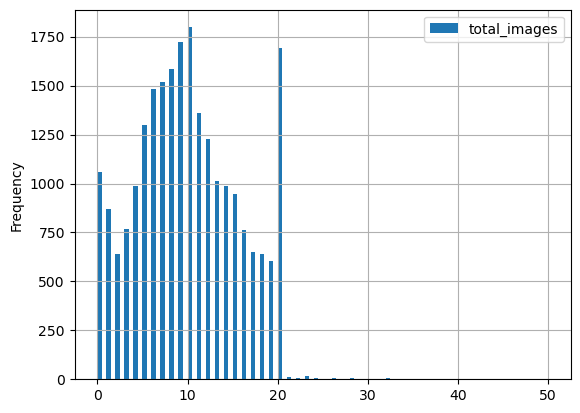

9.858475041140977 9.0
0    1059
1     872
2     640
3     769
4     986
5    1301
6    1482
7    1521
8    1585
9    1725
Name: total_images, dtype: int64
28    4
29    3
30    2
31    2
32    4
35    2
37    1
39    1
42    1
50    3
Name: total_images, dtype: int64


In [103]:
preprocessing_visual('total_images', sort_index=True, bins=100)

Есть объявления, в которых 50 фотографий, но особых выбросов нет.

#### last_price 

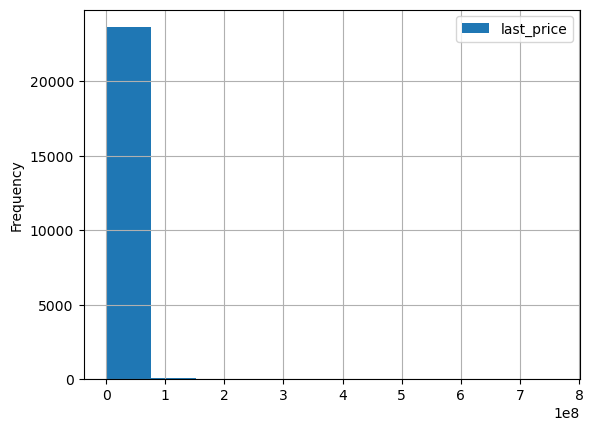

6541548.771551542 4650000.0
12190.0     1
430000.0    2
440000.0    1
450000.0    4
470000.0    3
480000.0    1
490000.0    2
500000.0    4
520000.0    1
530000.0    1
Name: last_price, dtype: int64
190870000.0    1
230000000.0    1
240000000.0    1
245000000.0    1
289238400.0    1
300000000.0    1
330000000.0    1
401300000.0    1
420000000.0    1
763000000.0    1
Name: last_price, dtype: int64


11430     85000000.0
12045     86738800.0
5534      87000000.0
15151     88000000.0
509       90000000.0
22494     91075000.0
12401     91500000.0
11329     95000000.0
492       95000000.0
155       96000000.0
16590     98000000.0
5631      99000000.0
6621      99000000.0
21923    115490000.0
1188     118000000.0
20264    119000000.0
1300     120000000.0
16647    122000000.0
4996     124000000.0
21023    124350000.0
20349    124480000.0
1928     125000000.0
7543     130000000.0
13864    130000000.0
21955    130000000.0
2243     130278280.0
7674     131000000.0
17912    135000000.0
793      135000000.0
12674    140000000.0
12859    140000000.0
3117     140000000.0
22229    148000000.0
15016    150000000.0
7857     150000000.0
1026     155000000.0
16495    159000000.0
2536     159984000.0
19155    160000000.0
19865    180000000.0
8900     190870000.0
5893     230000000.0
13749    240000000.0
16461    245000000.0
22831    289238400.0
15651    300000000.0
1436     330000000.0
14706    4013

In [104]:
preprocessing_visual('last_price', sort_index=True)
data.sort_values('last_price')['last_price'].tail(50)
#data['last_price'].plot(figsize=(15,5));

Есть квартиры слишком дорогие, однако им соответсвует и площадь, количество комнат.

#### total_area 

Процентильный размах 104.6 29.0


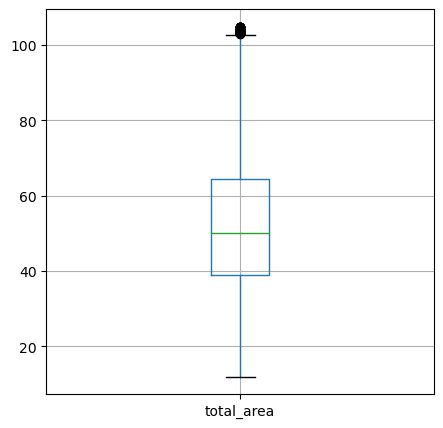

In [105]:
#preprocessing_visual('total_area', sort_index=True)
#data[['last_price', 'total_area', 'rooms']].corr()
#data.query('total_area > 500')
#quant('total_area')
#iqr('total_area')
data = data.loc[((iqr('total_area', print_iqr=False)[0])<data['total_area']) & 
         (data['total_area']<iqr('total_area', print_iqr=False)[1])]
print('Процентильный размах', np.percentile(data['total_area'], 98.2), np.percentile(data['total_area'], 2.5))
quant('total_area')

Есть слишком большие квартиры, однако им соответсвует и количество комнат, и площадь. Но для оптимизации выборки всё-таки применил правило квартилей и отсёк выходящие за эти нормы значения.

#### first_day_exposition

In [106]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#data['first_day_exposition'].hist(figsize=(8,4), bins=20)

(в ячейках, на которые разбил дату, будет подробнее понятна статистика по дням, месяцам, годам. см далее) 
Общий вывод, что число объявлений растёт. Изменил формат на более удобный, чтобы потом было удобнее раззбивать на столбцы.

#### rooms

In [107]:
#preprocessing_visual('rooms', sort_index=True, bins=7)
data['rooms'] = data['rooms'].astype('int64')
#quant('rooms')
#iqr('rooms')

Есть большие квартиры с 7-ю комнатами, однако они не входят в зону выбросов, поэтому их можно оставить. Изменил тип данных, так как число комнат всегда целое.

#### floors_total

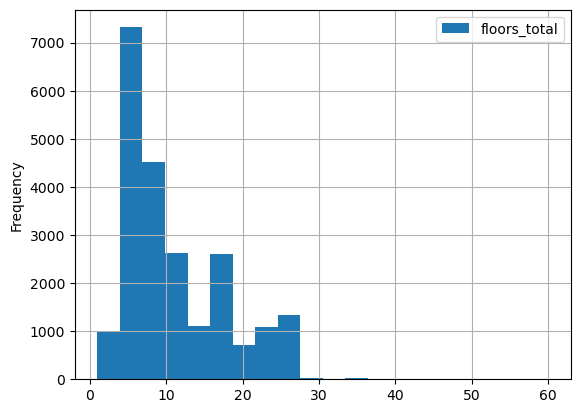

10.789838233979802 9.0
1.0       24
2.0      362
3.0      613
4.0     1074
5.0     5525
6.0      721
7.0      494
8.0      324
9.0     3702
10.0    1135
Name: floors_total, dtype: int64
27.0    163
28.0     21
29.0      1
33.0      1
34.0      1
35.0     24
36.0      3
37.0      1
52.0      1
60.0      1
Name: floors_total, dtype: int64


In [108]:
preprocessing_visual('floors_total', bins=20, sort_index=True)

In [109]:
preprocessing_isna('floors_total')

0


In [110]:
data['floors_total'] = data['floors_total'].astype('int64')
#data.info()

In [111]:
#quant('floors_total')
#iqr('floors_total')
#print((1 - data.query('floors_total>32.5').shape[0]/data.shape[0])*100)
data = data.loc[((iqr('floors_total', print_iqr=False)[0])<data['floors_total']) & 
         (data['floors_total']<iqr('floors_total', print_iqr=False)[1])]
#quant('floors_total')
#data.query('floors_total<floor') #34
data = data[data['floors_total']>=data['floor']]
#data.query('floors_total<floor') #0
#data[data['floors_total']<data['floor']]

Заменил пропуски медианным значением - 5-этажными домами, значение моды больше подходит. Сменил на целочисленный тип данных, поскольку количество этажей всегда целое число. Проверил выборку. Верхняя граница этажей = 32.5. Это примерно 99.865% выборки, поэтому выбросы не играют особого значения. В выборке обнаружилось 34 объявления, в которых этаж больше, чем количество этажей. Так как число таких аномалий мало, легче выбросить их из выборки.

#### ceiling_height

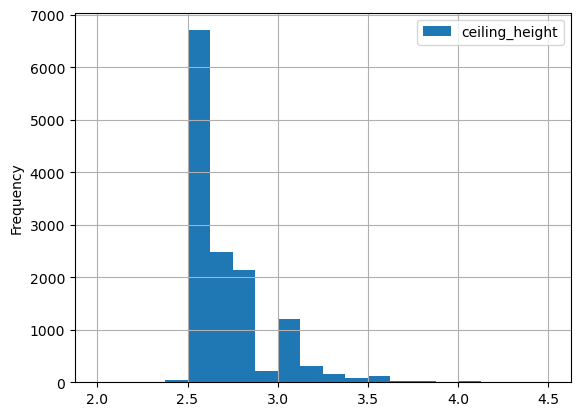

2.746039161044241 2.64
3.59     1
5.80     1
2.89     1
22.60    1
4.70     1
3.85     1
2.25     1
20.00    1
4.25     1
27.50    1
Name: ceiling_height, dtype: int64
3.10     167
3.20     218
2.65     668
2.75     874
3.00     930
2.80     936
2.55     975
2.70    1535
2.60    1637
2.50    3496
Name: ceiling_height, dtype: int64


In [112]:
preprocessing_visual('ceiling_height', range=(2,4.5), bins=20)
#data.query('ceiling_height > 10')

In [113]:
preprocessing_isna('ceiling_height')


0


In [114]:
#print((1 - data.query('ceiling_height>3.175').shape[0]/data.shape[0])*100) #(96.7) процент выборки в интервале

In [115]:
#iqr('ceiling_height')
#quant('ceiling_height')

In [116]:
data = data.loc[((iqr('ceiling_height', print_iqr=False)[0])<data['ceiling_height']) & 
         (data['ceiling_height']<iqr('ceiling_height', print_iqr=False)[1])]

In [117]:
#data.query('ceiling_height>3.175')

Проанализировав данные столбца 'ceiling_height' можно понять, что есть выбросы, которые составляют не больше 4%, поэтому могут быть удалены из выборки. Медианой заполняю пропуски. Проверяю, есть ли пропуски и выбросы.

#### living_area

In [118]:
#preprocessing_visual('living_area', range=(0,100), bins=20, tail=15, sort_index=True)

In [119]:
data.loc[(data['living_area'] > 100)&(data['last_price'] < 50000000), 'living_area'] = data['living_area']/10
data.loc[(data['living_area'] < 10)&(data['last_price'] > 50000), 'living_area'] = data['living_area']*10
preprocessing_isna('living_area')
#preprocessing_visual('living_area', range=(10,100), bins=20, tail=15, sort_index=True)

0


In [120]:
#quant('living_area')
#iqr('living_area')

In [121]:
data = data.loc[((iqr('living_area', print_iqr=False)[0])<data['living_area']) & 
         (data['living_area']<iqr('living_area', print_iqr=False)[1])]

In [122]:
print((1 - data.query('living_area>65.65').shape[0]/data.shape[0])*100) 

100.0


In [123]:
#data.query('10>living_area or living_area>100')
#preprocessing_visual('living_area', range=(0,70), bins=10, head=30, sort_index=True)

Проанализировав столбец 'living_area' подкорректировал данные, поскольку вряд ли будут сдаваться 2-хкомнатные квартиры площадью 400 кв.м., следовательно в данных закралась ошибка, добавили лишний ноль. Аналогично с размерами квартир < 10. Также избавился от пропусков, заменив их медианным значением. Отсеял выбросы.






#### floor

In [124]:
#preprocessing_visual('floor', sort_index=True)

Объявлений с квартирами выше 27 этажа нет.

#### is_apartment

In [125]:
data['is_apartment'].value_counts(dropna=False)

NaN      17635
False     2219
True        19
Name: is_apartment, dtype: int64

In [126]:
data['is_apartment'].fillna(False, inplace=True )
data['is_apartment'].value_counts(dropna=False)

False    19854
True        19
Name: is_apartment, dtype: int64

Скорее всего, если пропущен параметр 'is_apartment', значит, параметр False.

#### studio

In [127]:
data['studio'].value_counts(dropna=False)
#data.query('studio == True and rooms>1')
data.rename(columns={'studio':'is_studio'}, inplace=True)
#data.columns

Проверил, есть ли ошибки в данных, где квартира числится студией, но имеет несколько комнат, также заменил название, чтобы было понятно, что значение булевое, проверил сохранилась ли замена.

#### open_plan

In [128]:
data['open_plan'].value_counts(dropna=False)

False    19812
True        61
Name: open_plan, dtype: int64

In [129]:
data.rename(columns={'open_plan':'is_open_plan'}, inplace=True)
#data.columns

Аналогично предыдущему заменил имя на более подходящее для булевого столбца.

#### kitchen_area

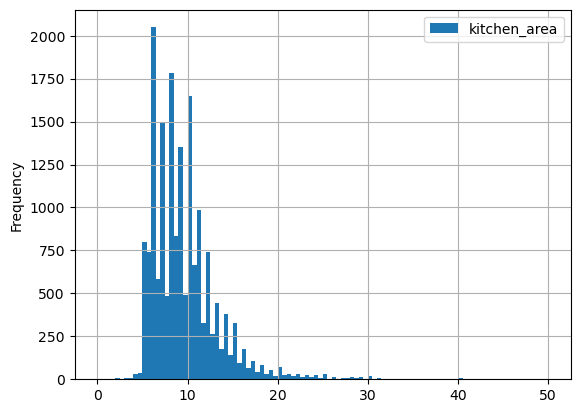

9.588283911319614 9.0
1.30    1
2.00    6
2.30    1
2.40    1
2.89    1
3.00    7
3.40    1
3.50    1
3.70    1
3.80    3
Name: kitchen_area, dtype: int64
40.5    1
41.1    1
42.7    1
43.2    1
43.4    1
44.9    1
46.8    1
49.4    1
50.0    1
55.7    1
Name: kitchen_area, dtype: int64


In [130]:
preprocessing_visual('kitchen_area', sort_index=True, bins=100, range=(0,50))

In [131]:
preprocessing_isna('kitchen_area')

0


In [132]:
#quant('kitchen_area')
#iqr('kitchen_area')
#print((1 - data.query('kitchen_area>16.67').shape[0]/data.shape[0])*100) #96%

In [133]:
data = data.loc[((iqr('kitchen_area', print_iqr=False)[0])<data['kitchen_area']) & 
         (data['kitchen_area']<iqr('kitchen_area', print_iqr=False)[1])]

In [134]:
print((1 - data.query('kitchen_area<16.67').shape[0]/data.shape[0])*100)

0.0


In [135]:
#data.query('kitchen_area<5 and total_area>60')
#data.query('kitchen_area/total_area>0.5 and studio==False and rooms>2 and last_price<50000000')
data.loc[(data['kitchen_area'] > 0)&(data['last_price'] < 50000000), 'kitchen_area'] = data['kitchen_area']/10

Выбросы аналогично высоте потолка поправил. Также удалил остальные выбросы за пределами интервала.

#### balcony

In [136]:
data['balcony'].fillna(0.0, inplace=True)
data['balcony'].isna().sum()

0

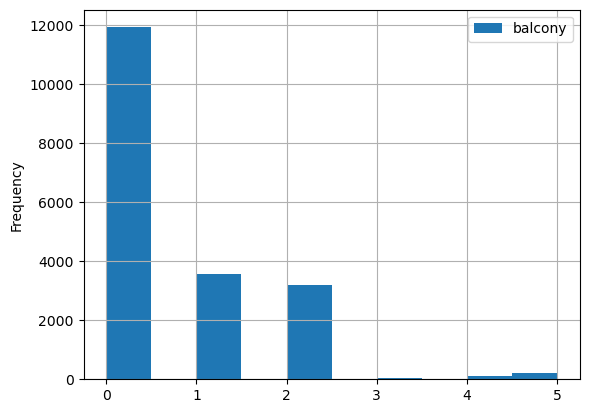

0.6128016789087093 0.0
0.0    11916
1.0     3566
2.0     3182
3.0       56
4.0      118
5.0      222
Name: balcony, dtype: int64
0.0    11916
1.0     3566
2.0     3182
3.0       56
4.0      118
5.0      222
Name: balcony, dtype: int64


In [137]:
preprocessing_visual('balcony', sort_index=True)

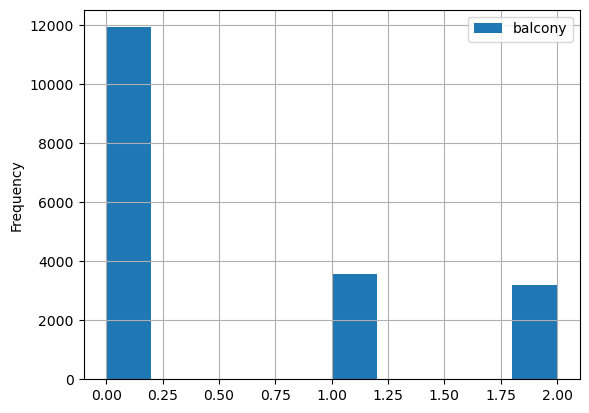

0.53204029147021 0.0
0.0    11916
1.0     3566
2.0     3182
Name: balcony, dtype: int64
0.0    11916
1.0     3566
2.0     3182
Name: balcony, dtype: int64


In [138]:
#data.query('balcony>2')
data = data.query('balcony < 3')
preprocessing_visual('balcony', sort_index=True)

In [139]:
data['balcony'] = data['balcony'].astype('int64')
#data.info()

Лучше исключить данные с тремя и более балконов, потому что такое при таких данных маловероятно. Помимо этого изменил тип данных на целочисленный, поскольку количество балконов - это только целое число.

#### locality_name

In [140]:
data['locality_name'].value_counts()
data['locality_name'] = data['locality_name'].str.replace('ё', "е")

In [141]:
def name_city(row):
    list_row = str(row).split()
    i = 0
    while list_row[i].islower():
        i+=1
    return ' '.join(list_row[i:])

def type_city(row):
    list_row = str(row).split()
    i = 0
    while list_row[i].islower():
        i+=1
    if i>0:
        return ' '.join(list_row[:i])
    else:
        return 'город'


In [142]:
data['locality_name'].fillna('Город неизветен', inplace=True)
data['locality_name'].isna().sum()
data['locality_type'] = data['locality_name']
data['locality_name'] = data['locality_name'].apply(name_city)
data['locality_type'] = data['locality_type'].apply(type_city)
#data

Я оставил в столбце только название и создал новую таблицу с типами населённых пунктов.

#### airports_nearest

In [143]:
#preprocessing_visual('airports_nearest')
#air_city = data.pivot_table(index='locality_name', values='airports_nearest', aggfunc='mean')
#data[data['airports_nearest'].isna()].groupby('locality_name').sum().index
#air_city

In [144]:
#data.query('airports_nearest > 80000')

Не заполняю пропуски, потому что расстояние зависит от населённого пункта, но сводная таблица с медианным значением не помогает, поскольку есть множество городов без данных.
Выбросы не стоит выкидывать, так как это особенности населённых пунктов. Выборочно были проверены по карте.

#### cityCenters_nearest 

In [145]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})
#preprocessing_visual('city_centers_nearest', sort_index=True)
#center_city = data.pivot_table(index='locality_name', values='city_centers_nearest', aggfunc='mean')
#data[data['city_centers_nearest'].isna()].groupby('locality_name').sum().index
#air_city

In [146]:
#data.query('city_centers_nearest > 60000')

Не заполняю пропуски, потому что расстояние зависит от населённого пункта, но сводная таблица с медианным значением не помогает, поскольку есть множество городов без данных. Также изменил название на принятый формат змейки.
Выбросы не стоит выкидывать, так как это особенности населённых пунктов.

#### parks_around3000

In [147]:
#preprocessing_visual('parks_around3000', sort_index=True)
preprocessing_isna('parks_around3000')
data['parks_around3000'] = data['parks_around3000'].astype('int64')
#data.info()

0


#### parks_nearest

In [148]:
#preprocessing_visual('parks_nearest', sort_index=True)
#data[data['parks_nearest'].isna()].groupby('locality_name').sum().index

#### ponds_around3000

In [149]:
#preprocessing_visual('ponds_around3000', sort_index=True)
preprocessing_isna('ponds_around3000')
data['ponds_around3000'] = data['ponds_around3000'].astype('int64')
#data.info()

0


#### ponds_nearest

In [150]:
#preprocessing_visual('ponds_nearest', sort_index=True)
#data[data['ponds_nearest'].isna()].groupby('locality_name').sum().index

Позиции сверху проверил. Если в количестве парков/прудов стоит пропуск, скорее всего это значение 0.

#### days_exposition

In [151]:
#preprocessing_visual('days_exposition', sort_index=True)
preprocessing_isna('days_exposition')
data['days_exposition'] = data['days_exposition'].astype('int64')
#data.info()

0


-163.5 392.5 45.0 184.0 139.0
89.8735533647664


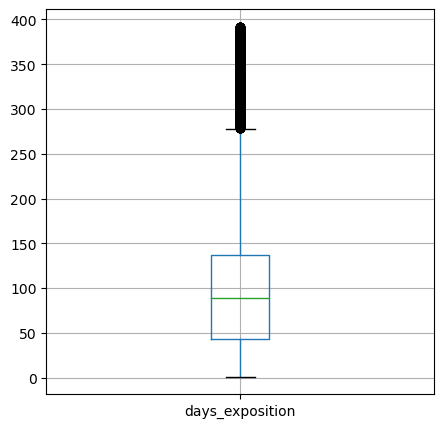

In [152]:
iqr('days_exposition')
quant('days_exposition')
print((1 - data.query('days_exposition>392.5').shape[0]/data.shape[0])*100)

Удаление 10% выборки может сильно повлиять на результат, поэтому сокращаю 2.5% выбивающихся значений с каждого конца (в данном случае только сверху).

In [153]:
data = data.loc[(data['kitchen_area']<np.percentile(data['days_exposition'], 97.5))]

In [154]:
print((1 - data.query('days_exposition>392').shape[0]/data.shape[0])*100)

89.8735533647664


In [155]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
is_studio                   0
is_open_plan                0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         4993
city_centers_nearest     4978
parks_around3000            0
parks_nearest           13315
ponds_around3000            0
ponds_nearest           12321
days_exposition             0
locality_type               0
dtype: int64

### Посчитайте и добавьте в таблицу новые столбцы

#### цена одного квадратного метра

In [156]:
data['meter_cost'] = data['last_price']/data['total_area']
#data

#### день публикации объявления (0 - понедельник, 1 - вторник и т.д.)


In [157]:
data['weekday'] = data['first_day_exposition'].dt.dayofweek
#data
data['weekday'].value_counts()

3    3334
1    3275
4    3185
2    3123
0    2813
5    1552
6    1382
Name: weekday, dtype: int64

#### месяц публикации объявления


In [158]:
data['month'] = data['first_day_exposition'].dt.month
#data
data['month'].value_counts()

3     2074
2     2068
4     1864
11    1849
10    1709
9     1546
6     1424
8     1382
7     1312
12    1279
1     1163
5      994
Name: month, dtype: int64

#### год публикации объявления


In [159]:
data['year'] = data['first_day_exposition'].dt.year
#data

#### тип этажа квартиры (значения — «первый», «последний», «другой»)


In [160]:
def typefloor(data):
    try:
        if data['floor'] == 1:
            return 'первый'
        elif data['floor'] == data['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'нет данных'
data['type_floor'] = data.apply(typefloor, axis=1)
data['type_floor'] = data['type_floor'].astype('category')
#data

#### расстояние в км до центра города

In [161]:
data['city_centers_km'] = data['city_centers_nearest']
data['city_centers_km'].fillna(0, inplace=True)
#data.isna().sum()
data['city_centers_km'] = data['city_centers_km'].apply(lambda x: x//1000)
data['city_centers_km'] = data['city_centers_km'].astype('int64')
#data.info()

### Проведите исследовательский анализ данных

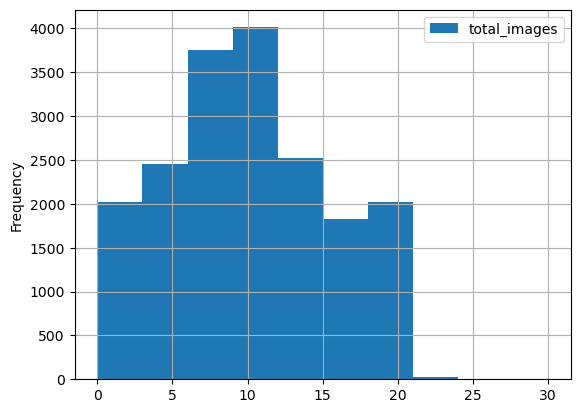

9.632393913416202 9.0
0     889
1     668
2     466
3     596
4     786
5    1075
6    1202
7    1258
8    1298
9    1428
Name: total_images, dtype: int64
24    4
26    3
27    1
28    3
29    2
30    1
31    1
32    1
35    1
39    1
Name: total_images, dtype: int64


In [162]:
preprocessing_visual('total_images', sort_index=True, bins=10, range=(0,30))

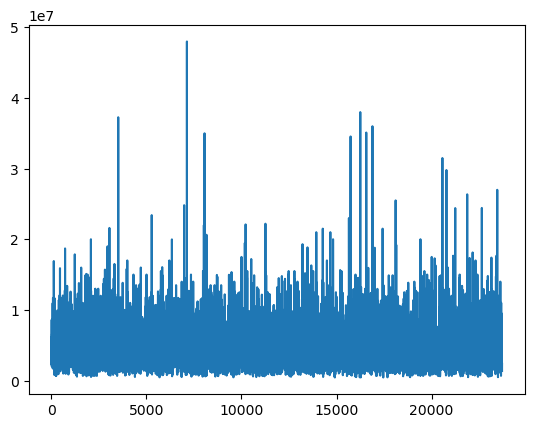

In [163]:
data['last_price'].plot();

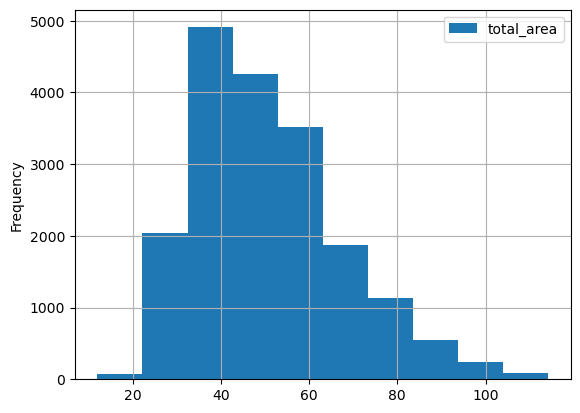

50.73895627946836 46.4
12.0    1
13.0    2
13.2    1
14.0    1
15.0    2
15.5    1
16.0    1
17.0    2
17.2    1
17.6    1
Name: total_area, dtype: int64
109.4    1
109.7    1
110.0    6
111.0    3
111.3    1
111.9    1
112.0    2
113.0    4
114.0    4
114.2    1
Name: total_area, dtype: int64


In [164]:
preprocessing_visual('total_area', sort_index=True)

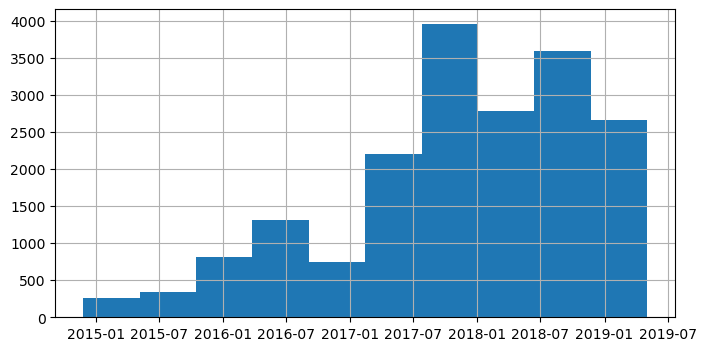

In [165]:
data['first_day_exposition'].hist(figsize=(8,4), bins=10);

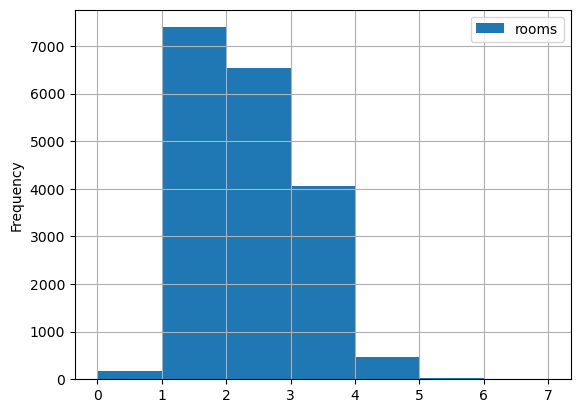

1.856836690955851 2.0
0     180
1    7392
2    6536
3    4064
4     463
5      27
6       1
7       1
Name: rooms, dtype: int64
0     180
1    7392
2    6536
3    4064
4     463
5      27
6       1
7       1
Name: rooms, dtype: int64


In [166]:
preprocessing_visual('rooms', sort_index=True, bins=7)

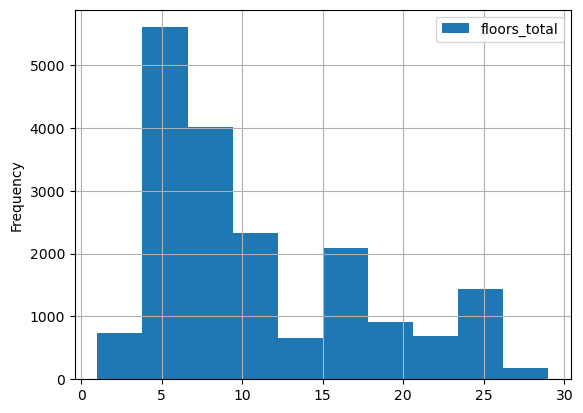

11.078975567938278 9.0
1       16
2      284
3      443
4      639
5     4602
6      363
7      283
8      219
9     3520
10     986
Name: floors_total, dtype: int64
20    205
21    136
22    246
23    303
24    405
25    925
26    112
27    159
28     21
29      1
Name: floors_total, dtype: int64


In [167]:
preprocessing_visual('floors_total', bins=10, sort_index=True)

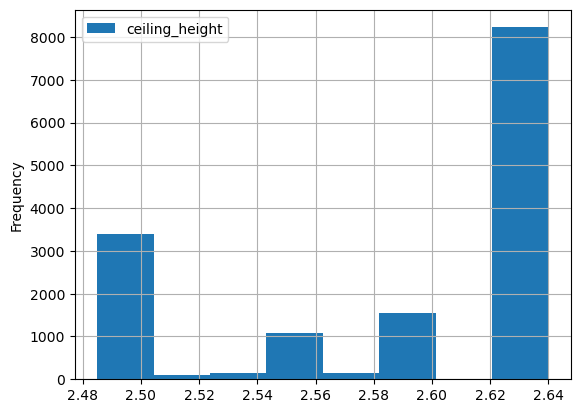

2.622766288040906 2.64
2.49     1
2.69     2
2.46     2
2.47     3
2.61     5
2.81     8
2.48     8
2.79     9
2.62    11
2.71    11
Name: ceiling_height, dtype: int64
2.57      96
2.56     135
2.65     621
2.75     757
2.80     782
2.55     943
2.70    1395
2.60    1539
2.50    3391
2.64    8214
Name: ceiling_height, dtype: int64


In [168]:
preprocessing_visual('ceiling_height', range=(2.485, 2.64), bins=8)

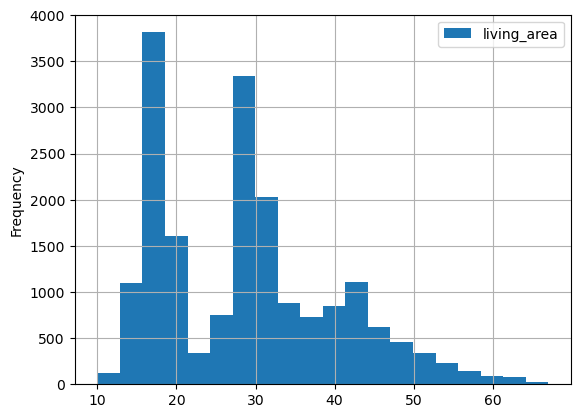

28.967891208208293 29.0
10.00    25
10.08     1
10.30     2
10.40     1
10.50     2
10.52     1
10.55     1
10.60     2
10.70     1
10.76     1
Name: living_area, dtype: int64
64.4    4
64.5    1
64.6    1
64.7    4
64.8    3
65.0    8
65.3    2
65.4    2
65.5    1
65.6    1
Name: living_area, dtype: int64


In [169]:
preprocessing_visual('living_area', range=(10,67), bins=20, sort_index=True)

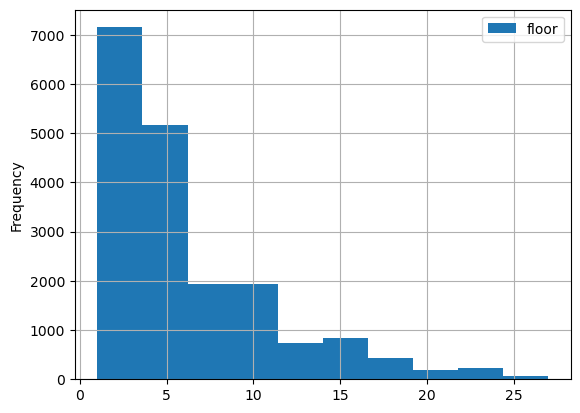

6.021538791255893 5.0
27      8
26     20
25     38
24     46
20     85
23     86
22     95
21    106
19    113
18    143
Name: floor, dtype: int64
10     564
8      924
9      931
7     1009
6     1028
5     2056
4     2077
3     2280
1     2382
2     2490
Name: floor, dtype: int64


In [170]:
preprocessing_visual('floor')

In [171]:
data['is_apartment'].value_counts(dropna=False)

False    18651
True        13
Name: is_apartment, dtype: int64

In [172]:
data['is_studio'].value_counts(dropna=False)

False    18530
True       134
Name: is_studio, dtype: int64

In [173]:
data['is_open_plan'].value_counts(dropna=False)

False    18603
True        61
Name: is_open_plan, dtype: int64

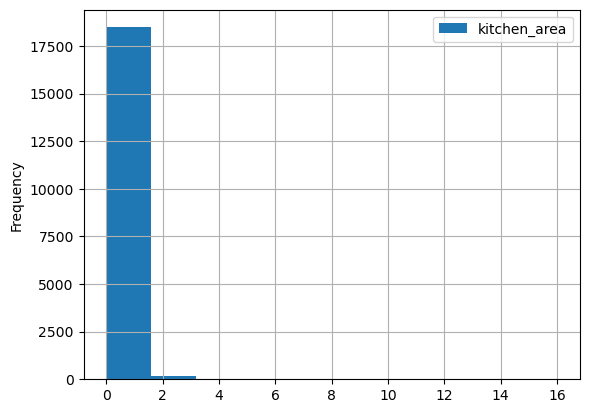

0.897689777111006 0.9
0.130    1
0.200    6
0.230    1
0.240    1
0.289    1
0.300    7
0.340    1
0.350    1
0.370    1
0.380    3
Name: kitchen_area, dtype: int64
1.625     1
1.626     1
1.627     1
1.630    11
1.640    12
1.642     1
1.645     2
1.646     1
1.648     1
1.650    18
Name: kitchen_area, dtype: int64


In [174]:
preprocessing_visual('kitchen_area', sort_index=True, bins=10, range=(0,16))

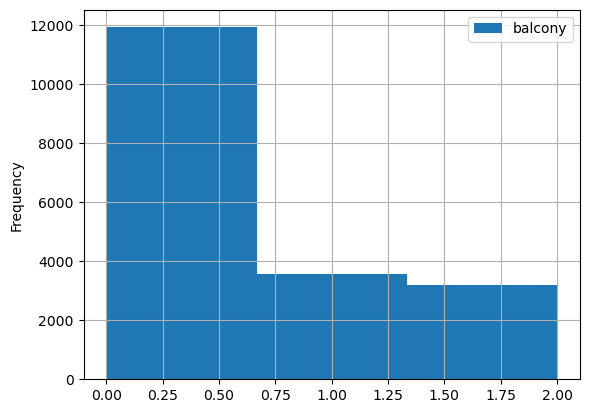

0.53204029147021 0.0
0    11916
1     3566
2     3182
Name: balcony, dtype: int64
0    11916
1     3566
2     3182
Name: balcony, dtype: int64


In [175]:
preprocessing_visual('balcony', sort_index=True, range=(0,2), bins=3)

In [176]:
data['locality_name'].value_counts()

Санкт-Петербург    11543
Мурино               546
Кудрово              421
Шушары               416
Всеволожск           355
                   ...  
Кондратьево            1
Цвылево                1
Жилпоселок             1
Мыза-Ивановка          1
Дзержинского           1
Name: locality_name, Length: 296, dtype: int64

In [177]:
data['locality_type'].value_counts()

город                                        15325
поселок                                       1949
деревня                                        842
поселок городского типа                        278
городской поселок                              171
поселок городского типа имени                   47
село                                            31
поселок станции                                 13
садовое товарищество                             4
поселок при железнодорожной станции              2
садоводческое некоммерческое товарищество        1
коттеджный поселок                               1
Name: locality_type, dtype: int64

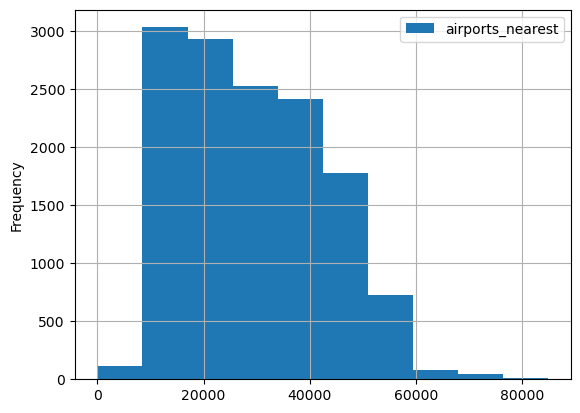

29233.128885962986 27921.0
24099.0    1
11000.0    1
27633.0    1
22301.0    1
36799.0    1
20081.0    1
18188.0    1
21031.0    1
20336.0    1
33705.0    1
Name: airports_nearest, dtype: int64
19499.0    18
37412.0    18
21793.0    18
51333.0    19
30073.0    19
44382.0    19
13461.0    20
21460.0    20
47303.0    21
21928.0    30
Name: airports_nearest, dtype: int64


In [178]:
preprocessing_visual('airports_nearest')

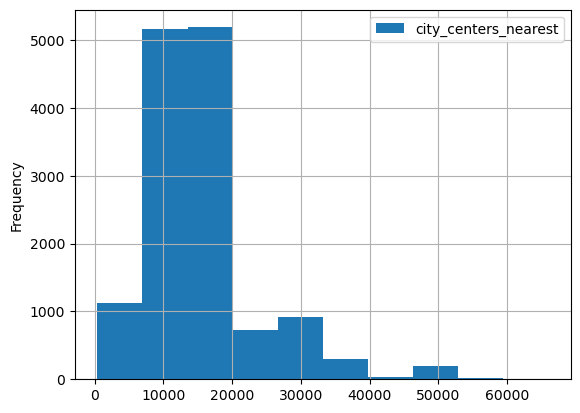

15597.370378488968 14010.0
399.0    1
467.0    1
472.0    1
515.0    1
650.0    1
671.0    1
675.0    1
686.0    1
743.0    1
752.0    1
Name: city_centers_nearest, dtype: int64
59626.0    1
60223.0    1
61495.0    1
62454.0    1
62706.0    1
64857.0    1
65105.0    1
65764.0    1
65952.0    1
65968.0    1
Name: city_centers_nearest, dtype: int64


In [179]:
preprocessing_visual('city_centers_nearest', sort_index=True)

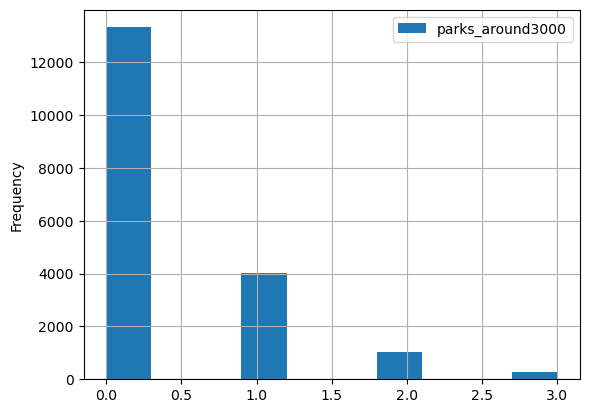

0.37274967852550367 0.0
0    13318
1     4021
2     1039
3      286
Name: parks_around3000, dtype: int64
0    13318
1     4021
2     1039
3      286
Name: parks_around3000, dtype: int64


In [180]:
preprocessing_visual('parks_around3000', sort_index=True)

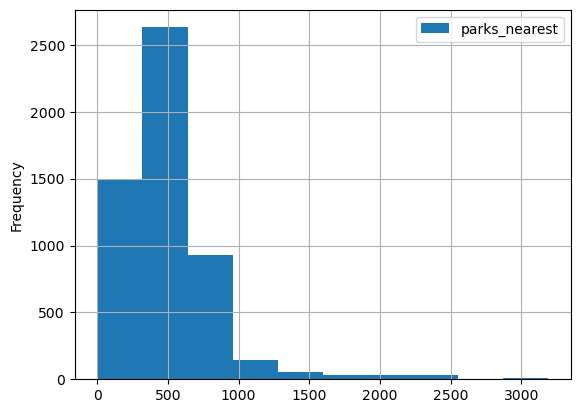

500.9491493737147 468.0
1.0     1
3.0     1
7.0     1
9.0     1
10.0    7
11.0    5
12.0    1
13.0    4
14.0    1
15.0    5
Name: parks_nearest, dtype: int64
2427.0    1
2467.0    4
2532.0    1
2555.0    1
2633.0    1
2880.0    1
2888.0    1
2984.0    1
3064.0    1
3190.0    2
Name: parks_nearest, dtype: int64


In [181]:
preprocessing_visual('parks_nearest', sort_index=True)

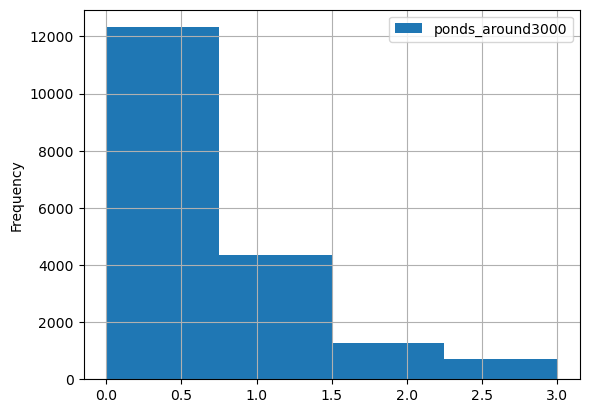

0.4839262751821689 0.0
0    12321
1     4359
2     1279
3      705
Name: ponds_around3000, dtype: int64
0    12321
1     4359
2     1279
3      705
Name: ponds_around3000, dtype: int64


In [182]:
preprocessing_visual('ponds_around3000', sort_index=True, bins=4)

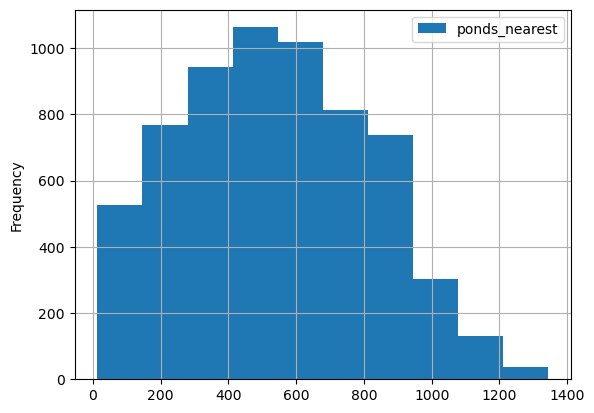

540.8268957906354 524.0
13.0    1
16.0    3
19.0    3
20.0    4
22.0    1
24.0    2
25.0    1
26.0    2
27.0    2
29.0    1
Name: ponds_nearest, dtype: int64
1253.0    1
1255.0    2
1258.0    2
1271.0    3
1275.0    1
1278.0    2
1299.0    1
1337.0    1
1341.0    2
1344.0    1
Name: ponds_nearest, dtype: int64


In [183]:
preprocessing_visual('ponds_nearest', sort_index=True)

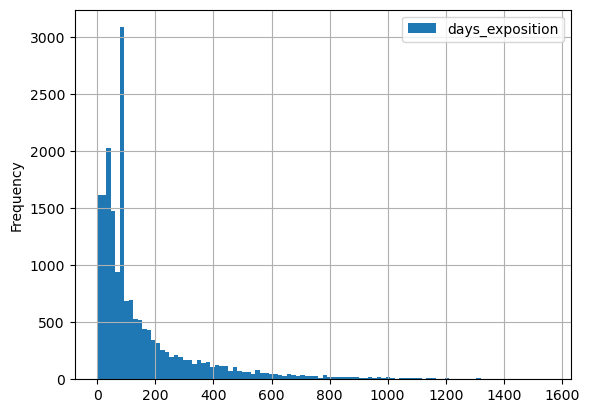

157.39289541363053 89.0
1       1
2       1
3     139
4     145
5     132
6     106
7     196
8     114
9     121
10    110
Name: days_exposition, dtype: int64
1362    1
1368    1
1373    1
1396    1
1413    1
1452    1
1477    1
1484    1
1512    1
1553    1
Name: days_exposition, dtype: int64


In [184]:
preprocessing_visual('days_exposition', sort_index=True, range=(0,1553), bins=100)

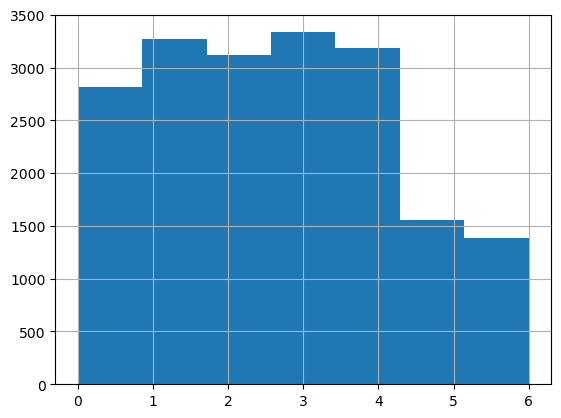

In [185]:
data['weekday'].hist(bins=7);

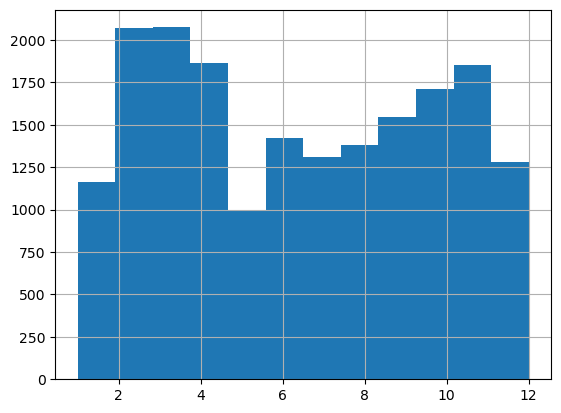

In [186]:
data['month'].hist(bins=12);

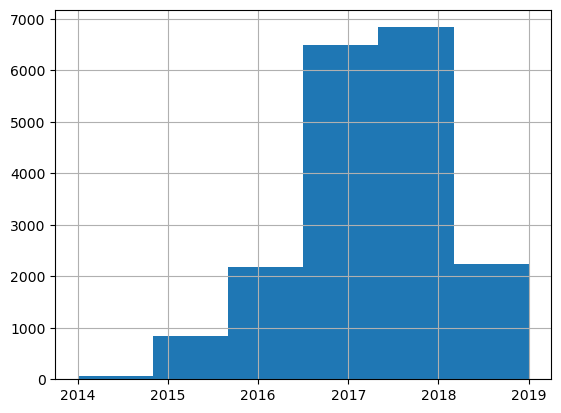

In [187]:
data['year'].hist(bins=6);

In [188]:
data['type_floor'].value_counts().sort_index()

другой       13824
первый        2382
последний     2458
Name: type_floor, dtype: int64

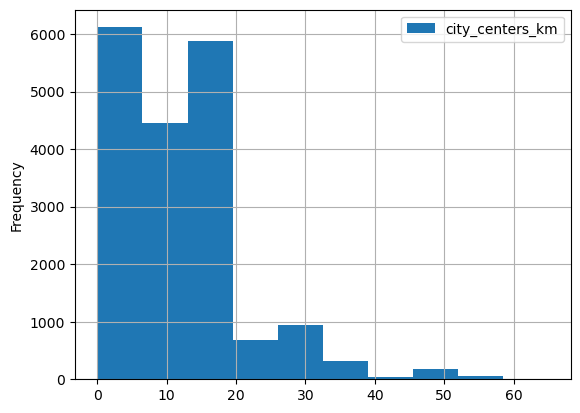

11.072653236176597 12.0
0    4999
1      60
2      72
3     155
4     298
5     314
6     218
7     244
8     386
9     523
Name: city_centers_km, dtype: int64
52    34
53    12
54     2
56     1
59     2
60     1
61     1
62     2
64     1
65     4
Name: city_centers_km, dtype: int64


In [189]:
preprocessing_visual('city_centers_km', sort_index=True)

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18664 entries, 1 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18664 non-null  int64         
 1   last_price            18664 non-null  float64       
 2   total_area            18664 non-null  float64       
 3   first_day_exposition  18664 non-null  datetime64[ns]
 4   rooms                 18664 non-null  int64         
 5   ceiling_height        18664 non-null  float64       
 6   floors_total          18664 non-null  int64         
 7   living_area           18664 non-null  float64       
 8   floor                 18664 non-null  int64         
 9   is_apartment          18664 non-null  bool          
 10  is_studio             18664 non-null  bool          
 11  is_open_plan          18664 non-null  bool          
 12  kitchen_area          18664 non-null  float64       
 13  balcony         

Проанализировав данные, можно заметить, что
нормальное распределение у столбцов: 'total_images'...
равномерное распределение у столбцов: 'last_price'...
ассиметричное, смещённое вправо у столбцов: 'total_area', 'rooms', 'floors_total'...
ассиметричное, смещённое влево у столбцов: 'first_day_exposition', 'living_area'...
ассиметричное у столбцов: 'ceiling_height'...
и т.д.
Тип распределения зависит от особенностей сферы, например, понятно, что у столбца 'floors_total' будет смещение вправо. В период СССР была массовая застройка домами 5 и 9 этажей, сейчас вариаций больше и высоким зданиям иногда отдаётся приоритет за компактность. 
Можно сделать выводы, что:
- выбросы в большинстве были исключены
- пропуски заполнены
- аномалии проверены 
- столбцы преведены в правильный тип данных
- данные дополнены новыми уточняющими столбцами, которые помогут определять зависимость значений
Теперь можно проанализировать зависимости данных

#### Скорость продажи квартиры

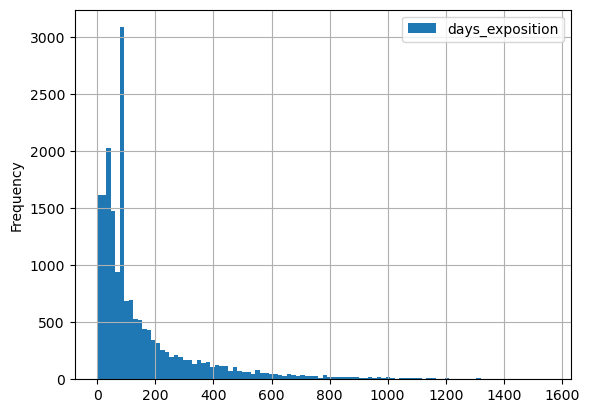

157.39289541363053 89.0
1       1
2       1
3     139
4     145
5     132
6     106
7     196
8     114
9     121
10    110
Name: days_exposition, dtype: int64
1362    1
1368    1
1373    1
1396    1
1413    1
1452    1
1477    1
1484    1
1512    1
1553    1
Name: days_exposition, dtype: int64


count    18664.000000
mean       157.392895
std        193.584191
min          1.000000
25%         45.000000
50%         89.000000
75%        184.000000
max       1553.000000
Name: days_exposition, dtype: float64

In [191]:
preprocessing_visual('days_exposition', sort_index=True, range=(0,1553), bins=100, more=1)
data['days_exposition'].describe()

In [192]:
days_corr = data.corr()
days_corr.reset_index(inplace=True)
days_corr[['index','days_exposition']].sort_values('days_exposition')

,index,days_exposition
23,year,-0.567006
18,ponds_nearest,-0.070377
0,total_images,-0.042975
20,meter_cost,-0.027750
7,floor,-0.021380
10,is_open_plan,-0.021371
12,balcony,-0.021206
5,floors_total,-0.019422
21,weekday,-0.017770
22,month,-0.015911


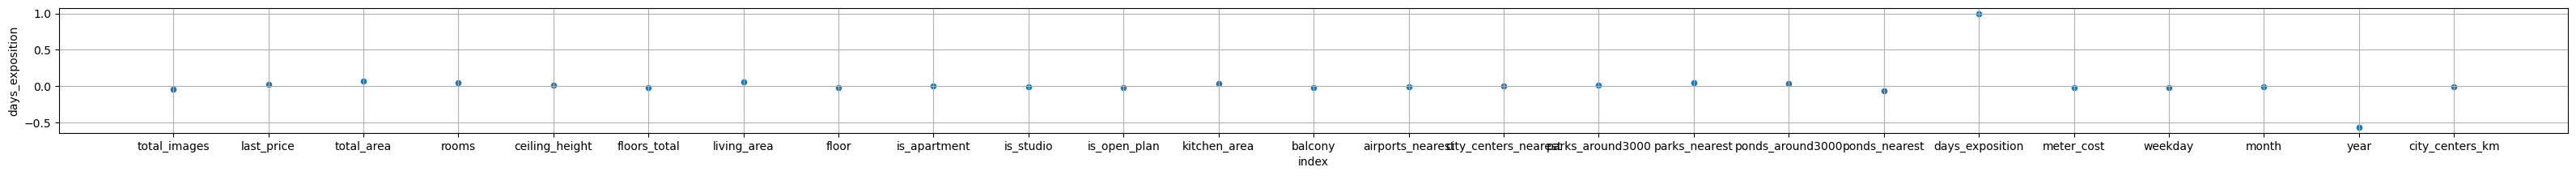

In [193]:
days_corr.plot(x='index', y='days_exposition', figsize=(40,2), kind='scatter', grid=True);

Примерная скорость продажи квартиры - это полгода. Корреляция с другими параметрами незначительная.  
<pre>
Быстрая скорость продажи         - это до периода в 40 дней.  
Оптимальная скорость продажи     - это 40-200 дней.  
Медленная скорость продажи       - это 200-450 дней.  
Очень медленная скорость продажи - это 150+ дней.  
</pre>

#### Из чего состоит стоимость?

median    4200000.0

count    1.866400e+04
mean     4.645661e+06
std      2.432495e+06
min      4.300000e+05
25%      3.200000e+06
50%      4.200000e+06
75%      5.537804e+06
max      4.800000e+07
Name: last_price, dtype: float64

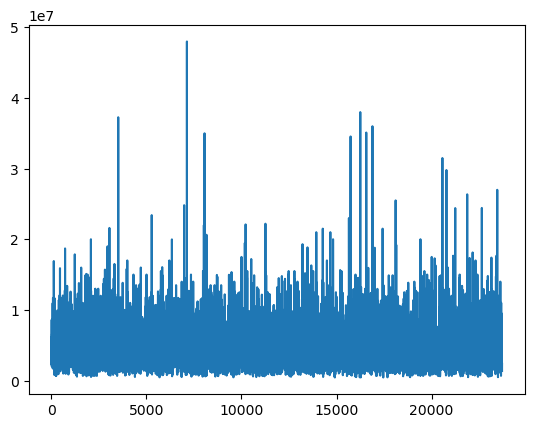

In [194]:
data['last_price'].plot()
print('median   ', data['last_price'].median(), end='')
data['last_price'].describe()


In [195]:
price_corr = data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'type_floor','year', 'month', 'weekday']]
#price_corr.reset_index(inplace=True)
#price_corr[['index','last_price']].sort_values('last_price')
price_corr.corr()

,last_price,total_area,living_area,kitchen_area,rooms,year,month,weekday
last_price,1.000000,0.663332,0.492961,0.433098,0.386308,0.009038,0.001173,-0.000859
total_area,0.663332,1.000000,0.861438,0.384186,0.801079,-0.049472,0.009370,-0.001976
living_area,0.492961,0.861438,1.000000,0.118955,0.861372,-0.038313,0.000369,0.003099
kitchen_area,0.433098,0.384186,0.118955,1.000000,-0.027760,-0.030955,0.019399,-0.006878
rooms,0.386308,0.801079,0.861372,-0.027760,1.000000,-0.027348,-0.001925,0.001034
year,0.009038,-0.049472,-0.038313,-0.030955,-0.027348,1.000000,-0.266858,0.000008
month,0.001173,0.009370,0.000369,0.019399,-0.001925,-0.266858,1.000000,0.011251
weekday,-0.000859,-0.001976,0.003099,-0.006878,0.001034,0.000008,0.011251,1.000000


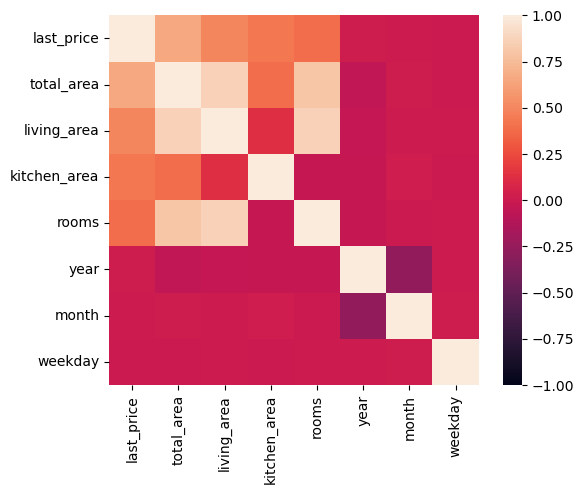

In [196]:
sns.heatmap(price_corr.corr(), vmin=-1, square=True);

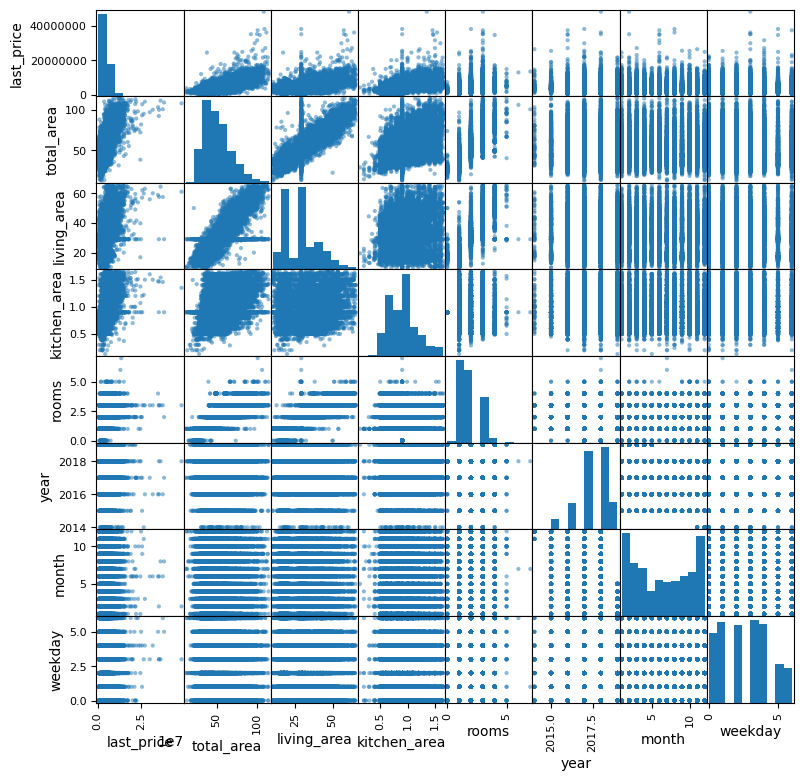

In [197]:
pd.plotting.scatter_matrix(price_corr, figsize=(9, 9));

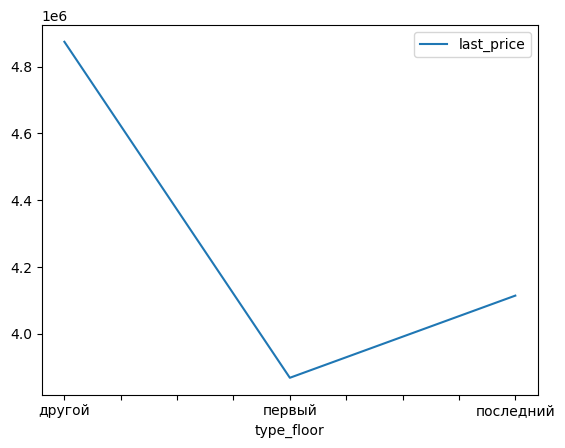

In [198]:
pd.pivot_table(data, index='type_floor', values='last_price').plot();

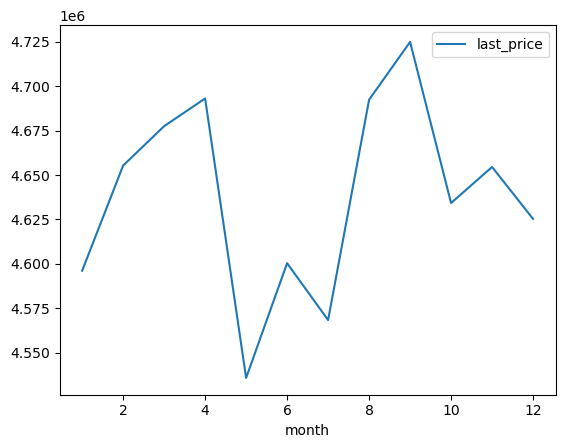

In [200]:
pd.pivot_table(data, index='month', values='last_price').plot();

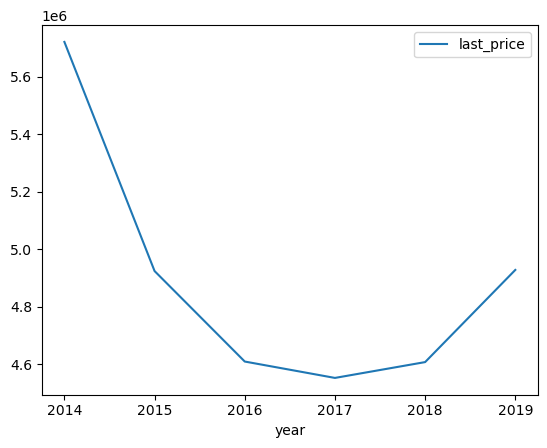

In [201]:
pd.pivot_table(data, index='year', values='last_price').plot();

Цена имеет умеренную взаимосвязь с общей площадью, послабее с жилой площадью, площадью кухни и количеством комнат.
Можно заметить, что цена на первый и последний этажи значительно ниже. Помимо этого, в 2019 году цены на жильё начали подниматься после значительного обвала, а самые высокие цены были в 2014. Также можно выделить сезоны, когда цены на жильё высокие: это февраль-апрель и август-октябрь. 

#### Средняя стоимость квадратного метра

In [202]:
cities_meter = data.value_counts('locality_name').head(10)
cities_meter = pd.DataFrame(index=cities_meter.index) 
meter_cost = pd.pivot_table(data, index = 'locality_name', values='meter_cost', aggfunc='mean').sort_values('meter_cost')
cities_meter = cities_meter.join(meter_cost['meter_cost'])
cities_meter

,meter_cost
locality_name,
Санкт-Петербург,106174.544187
Мурино,86354.143134
Кудрово,95796.783798
Шушары,78678.600846
Всеволожск,68519.243813
Парголово,90961.367758
Колпино,75145.495678
Пушкин,100002.858192
Гатчина,68278.877940


#### Стоимость километра

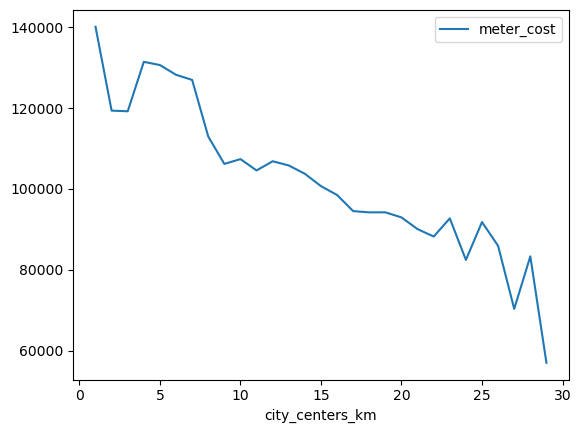

In [203]:
km_cost_data = data.query('locality_name=="Санкт-Петербург" and city_centers_km>0')
km_cost = pd.pivot_table(km_cost_data, index='city_centers_km', values='meter_cost')
km_cost.reset_index(inplace=True)
km_cost.plot(x='city_centers_km', y='meter_cost');

Преимущественно, чем ближе к центру, тем дороже кв.метр.

#### Доп. исследования

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18664 entries, 1 to 23698
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          18664 non-null  int64         
 1   last_price            18664 non-null  float64       
 2   total_area            18664 non-null  float64       
 3   first_day_exposition  18664 non-null  datetime64[ns]
 4   rooms                 18664 non-null  int64         
 5   ceiling_height        18664 non-null  float64       
 6   floors_total          18664 non-null  int64         
 7   living_area           18664 non-null  float64       
 8   floor                 18664 non-null  int64         
 9   is_apartment          18664 non-null  bool          
 10  is_studio             18664 non-null  bool          
 11  is_open_plan          18664 non-null  bool          
 12  kitchen_area          18664 non-null  float64       
 13  balcony         

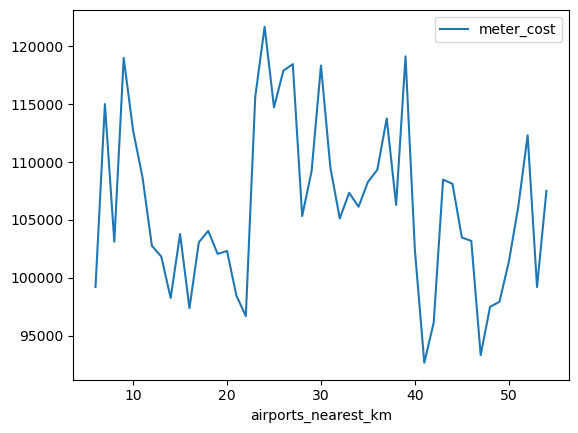

In [205]:
data['airports_nearest_km'] = data['airports_nearest']
data['airports_nearest_km'].fillna(0, inplace=True)
#data.isna().sum()
data['airports_nearest_km'] = data['airports_nearest_km'].apply(lambda x: x//1000)
data['airports_nearest_km'] = data['airports_nearest_km'].astype('int64')
#data.info()
km_cost_data = data.query('locality_name=="Санкт-Петербург" and airports_nearest_km > 0')
km_cost = pd.pivot_table(km_cost_data, index='airports_nearest_km', values='meter_cost')
km_cost.reset_index(inplace=True)
km_cost.plot(x='airports_nearest_km', y='meter_cost');

Явной зависимости расстояния до аэропорта и стоимости кв.м. не выявлено.

,meter_cost,is_apartment,is_studio,is_open_plan
meter_cost,1.000000,0.012550,0.040497,0.018370
is_apartment,0.012550,1.000000,-0.002245,-0.001512
is_studio,0.040497,-0.002245,1.000000,-0.004870
is_open_plan,0.018370,-0.001512,-0.004870,1.000000


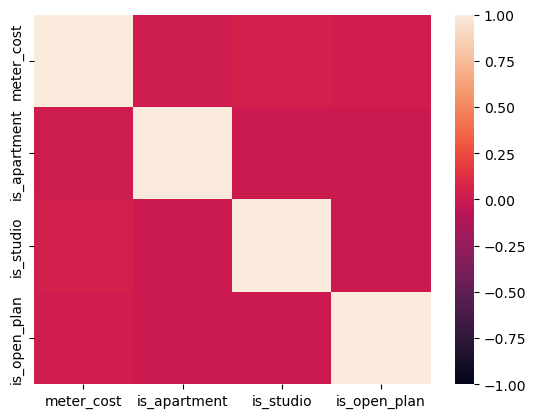

In [206]:
sns.heatmap(data[['meter_cost', 'is_apartment', 'is_studio', 'is_open_plan']].corr(), vmin=-1);
data[['meter_cost', 'is_apartment', 'is_studio', 'is_open_plan']].corr()

In [207]:
pd.pivot_table(data, index='is_apartment', values='meter_cost')

,meter_cost
is_apartment,
False,91662.560694
True,106688.255933


In [208]:
pd.pivot_table(data, index='is_studio', values='meter_cost')

,meter_cost
is_studio,
False,91564.245421
True,106715.665520


In [209]:
pd.pivot_table(data, index='is_open_plan', values='meter_cost')

,meter_cost
is_open_plan,
False,91639.799238
True,101806.256093


In [210]:
pd.pivot_table(data, index='balcony', values='meter_cost')

,meter_cost
balcony,
0,90819.064986
1,90381.254382
2,96318.615755


Между 'is_apartment', 'is_studio', 'is_open_plan' и т.д. и стоимостью кв.м. выявлена очень маленькая зависимость, то есть это не основные параметры, из которых складывается стоимость квартиры.

In [211]:
pd.pivot_table(data, index='locality_name', values='meter_cost').sort_values('meter_cost')

,meter_cost
locality_name,
Старополье,11206.221198
Свирь,11481.481481
Вахнова Кара,11688.311688
Выскатка,12335.480902
Совхозный,12629.129129
...,...
Пушкин,100002.858192
Зеленогорск,100123.734519
Сестрорецк,101667.640579


In [212]:
pd.pivot_table(data, index='locality_type', values='meter_cost').sort_values('meter_cost')

,meter_cost
locality_type,
садоводческое некоммерческое товарищество,22580.645161
поселок станции,34613.322012
поселок при железнодорожной станции,42430.142006
коттеджный поселок,45690.298507
село,47873.013153
садовое товарищество,48792.095667
поселок городского типа,49428.663783
городской поселок,57489.652410
поселок городского типа имени,57695.012015


In [213]:
pd.pivot_table(data, index=['locality_type', 'locality_name'], values='meter_cost').sort_values('meter_cost')

meter_cost
locality_type   locality_name                 
деревня         Старополье        11206.221198
поселок станции Свирь             11481.481481
деревня         Вахнова Кара      11688.311688
                Выскатка          12335.480902
поселок         Совхозный         12629.129129
...                                        ...
город           Зеленогорск      100123.734519
                Кудрово          100216.133968
                Сестрорецк       101667.640579
                Санкт-Петербург  106174.544187
поселок         Лисий Нос        113728.348730

[321 rows x 1 columns]

В то время как от типа населённого пункта и от типа населённого пункта цена зависит.

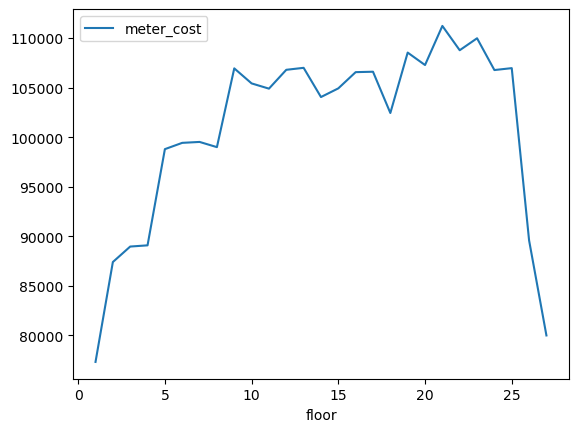

In [218]:
pd.pivot_table(data[data['floors_total']>data['floor']], index='floor', values='meter_cost').plot();

Также квадратный метр на высоких этажах (до 23) дороже.

### Общий вывод

Так, были выявлены ошибки в данных. (можно составить список того, какие отклонения были, чтобы отправить на перепроверку)
Теперь можно выявить, что, в основном, цена квартиры зависит от:  
- площади квартиры (прямопропорционально)
- от жилой площади квартиры (прямопропорционально)
- от расстояния квартиры до центра (обратнопропорционально)
- от типа населённого пункта (в городах и посёлках дороже)
- от населённого пункта (в Питере квартиры дорогие)
- от года (общие тенденции на продажу, был спад цен, в 2019 снова начался рост)
- от месяца (есть сезоны продаж, когда стоимость выше)
- от этажа и типа этажа (цены на высокие этажи дороже, но до 24 этажа)


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод